In [1]:
## all imports
from IPython.display import HTML
import numpy as np
import urllib2
import bs4 #this is beautiful soup
import time
import operator
import socket
import cPickle
import re # regular expressions

from pandas import Series
import pandas as pd
from pandas import DataFrame

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_context("talk")
sns.set_style("white")

In [2]:
htmlString = """<!DOCTYPE html>
<html>
  <head>
    <title>This is a title</title>
  </head>
  <body>
    <h2> Test </h2>
    <p>Hello world!</p>
  </body>
</html>"""

htmlOutput = HTML(htmlString)
htmlOutput

In [3]:
url = 'http://www.crummy.com/software/BeautifulSoup'
ss= urllib2.urlopen(url).read()

In [4]:
print ss

<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.0 Transitional//EN"
"http://www.w3.org/TR/REC-html40/transitional.dtd">
<html>
<head>
<meta http-equiv="Content-Type" content="text/html; charset=utf-8">
<title>Beautiful Soup: We called him Tortoise because he taught us.</title>
<link rev="made" href="mailto:leonardr@segfault.org">
<link rel="stylesheet" type="text/css" href="/nb/themes/Default/nb.css">
<meta name="Description" content="Beautiful Soup: a library designed for screen-scraping HTML and XML.">
<meta name="generator" content="Markov Approximation 1.4 (module: leonardr)">
<meta name="author" content="Leonard Richardson">
</head>
<body bgcolor="white" text="black" link="blue" vlink="660066" alink="red">
<img align="right" src="10.1.jpg" width="250"><br />

<p>You didn't write that awful page. You're just trying to get some
data out of it. Beautiful Soup is here to help. Since 2004, it's been
saving programmers hours or days of work on quick-turnaround
screen scraping projects.</p>

<

In [5]:
print 'Alice' in ss

False


In [6]:
print ss.find('Hello')

-1


In [7]:
print ss.count('Soup')

41


In [8]:
print ss.count('soup')

11


In [9]:
print 'alien video games' in ss

True


In [10]:
print ss.find('alien video games')

1639


In [11]:
where= ss.find('alien video games')

In [12]:
ss[where: where + len('alien video games')]

'alien video games'

In [13]:
ss[where-10 : where+len('alien video games')+5]

'vel about alien video games</a>.'

In [14]:
len(ss)

8894

In [15]:
soup= bs4.BeautifulSoup(ss)

In [16]:
print soup

<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.0 Transitional//EN" "http://www.w3.org/TR/REC-html40/transitional.dtd">
<html>
<head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<title>Beautiful Soup: We called him Tortoise because he taught us.</title>
<link href="mailto:leonardr@segfault.org" rev="made"/>
<link href="/nb/themes/Default/nb.css" rel="stylesheet" type="text/css"/>
<meta content="Beautiful Soup: a library designed for screen-scraping HTML and XML." name="Description"/>
<meta content="Markov Approximation 1.4 (module: leonardr)" name="generator"/>
<meta content="Leonard Richardson" name="author"/>
</head>
<body alink="red" bgcolor="white" link="blue" text="black" vlink="660066">
<img align="right" src="10.1.jpg" width="250"/><br/>
<p>You didn't write that awful page. You're just trying to get some
data out of it. Beautiful Soup is here to help. Since 2004, it's been
saving programmers hours or days of work on quick-turnaround
screen scraping projects.</

In [17]:
print soup.prettify()

<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.0 Transitional//EN" "http://www.w3.org/TR/REC-html40/transitional.dtd">
<html>
 <head>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <title>
   Beautiful Soup: We called him Tortoise because he taught us.
  </title>
  <link href="mailto:leonardr@segfault.org" rev="made"/>
  <link href="/nb/themes/Default/nb.css" rel="stylesheet" type="text/css"/>
  <meta content="Beautiful Soup: a library designed for screen-scraping HTML and XML." name="Description"/>
  <meta content="Markov Approximation 1.4 (module: leonardr)" name="generator"/>
  <meta content="Leonard Richardson" name="author"/>
 </head>
 <body alink="red" bgcolor="white" link="blue" text="black" vlink="660066">
  <img align="right" src="10.1.jpg" width="250"/>
  <br/>
  <p>
   You didn't write that awful page. You're just trying to get some
data out of it. Beautiful Soup is here to help. Since 2004, it's been
saving programmers hours or days of work on quick-tur

In [18]:
soup.findAll('a')

[<a href="bs4/download/"><h1>Beautiful Soup</h1></a>,
 <a href="#Download">Download</a>,
 <a href="bs4/doc/">Documentation</a>,
 <a href="#HallOfFame">Hall of Fame</a>,
 <a href="https://code.launchpad.net/beautifulsoup">Source</a>,
 <a href="https://groups.google.com/forum/?fromgroups#!forum/beautifulsoup">Discussion group</a>,
 <a href="http://www.candlemarkandgleam.com/shop/constellation-games/"><i>Constellation
 Games</i>, my sci-fi novel about alien video games</a>,
 <a href="http://constellation.crummy.com/Constellation%20Games%20excerpt.html">read
 the first two chapters for free</a>,
 <a href="https://groups.google.com/forum/?fromgroups#!forum/beautifulsoup">the discussion
 group</a>,
 <a href="https://bugs.launchpad.net/beautifulsoup/">file it</a>,
 <a href="http://lxml.de/">lxml</a>,
 <a href="http://code.google.com/p/html5lib/">html5lib</a>,
 <a href="bs4/doc/">Read more.</a>,
 <a name="Download"><h2>Download Beautiful Soup</h2></a>,
 <a href="bs4/download/">Beautiful Soup
 

In [19]:
soup.findAll('ol')

[<ol>
 <li>Beautiful Soup provides a few simple methods and Pythonic idioms
 for navigating, searching, and modifying a parse tree: a toolkit for
 dissecting a document and extracting what you need. It doesn't take
 much code to write an application
 
 </li><li>Beautiful Soup automatically converts incoming documents to
 Unicode and outgoing documents to UTF-8. You don't have to think
 about encodings, unless the document doesn't specify an encoding and
 Beautiful Soup can't detect one. Then you just have to specify the
 original encoding.
 
 </li><li>Beautiful Soup sits on top of popular Python parsers like <a href="http://lxml.de/">lxml</a> and <a href="http://code.google.com/p/html5lib/">html5lib</a>, allowing you
 to try out different parsing strategies or trade speed for
 flexibility.
 
 </li></ol>]

In [20]:
soup.findAll('li')

[<li>Beautiful Soup provides a few simple methods and Pythonic idioms
 for navigating, searching, and modifying a parse tree: a toolkit for
 dissecting a document and extracting what you need. It doesn't take
 much code to write an application
 
 </li>, <li>Beautiful Soup automatically converts incoming documents to
 Unicode and outgoing documents to UTF-8. You don't have to think
 about encodings, unless the document doesn't specify an encoding and
 Beautiful Soup can't detect one. Then you just have to specify the
 original encoding.
 
 </li>, <li>Beautiful Soup sits on top of popular Python parsers like <a href="http://lxml.de/">lxml</a> and <a href="http://code.google.com/p/html5lib/">html5lib</a>, allowing you
 to try out different parsing strategies or trade speed for
 flexibility.
 
 </li>, <li><a href="http://www.nytimes.com/2007/10/25/arts/design/25vide.html">"Movable
  Type"</a>, a work of digital art on display in the lobby of the New
  York Times building, uses Beautiful So

In [21]:
firsta= soup.find('a')

In [22]:
firsta

<a href="bs4/download/"><h1>Beautiful Soup</h1></a>

In [23]:
firsta.get('href')

'bs4/download/'

In [24]:
firsta.getText()

u'Beautiful Soup'

In [25]:
firsta.get_text()

u'Beautiful Soup'

In [26]:
allLinks= [ll.get('href') for ll in soup.findAll('a')]
allLinks

['bs4/download/',
 '#Download',
 'bs4/doc/',
 '#HallOfFame',
 'https://code.launchpad.net/beautifulsoup',
 'https://groups.google.com/forum/?fromgroups#!forum/beautifulsoup',
 'http://www.candlemarkandgleam.com/shop/constellation-games/',
 'http://constellation.crummy.com/Constellation%20Games%20excerpt.html',
 'https://groups.google.com/forum/?fromgroups#!forum/beautifulsoup',
 'https://bugs.launchpad.net/beautifulsoup/',
 'http://lxml.de/',
 'http://code.google.com/p/html5lib/',
 'bs4/doc/',
 None,
 'bs4/download/',
 'http://www.crummy.com/software/BeautifulSoup/bs3/documentation.html',
 'download/3.x/BeautifulSoup-3.2.1.tar.gz',
 None,
 'http://www.nytimes.com/2007/10/25/arts/design/25vide.html',
 'https://github.com/reddit/reddit/blob/85f9cff3e2ab9bb8f19b96acd8da4ebacc079f04/r2/r2/lib/media.py',
 'http://www.harrowell.org.uk/viktormap.html',
 'http://svn.python.org/view/tracker/importer/',
 'http://www2.ljworld.com/',
 'http://www.b-list.org/weblog/2010/nov/02/news-done-broke/',
 '

In [27]:
allHttpLinks= []
for link in allLinks:
    if link is not None and link[:4]== 'http':
        allHttpLinks.append(link)

print allHttpLinks

['https://code.launchpad.net/beautifulsoup', 'https://groups.google.com/forum/?fromgroups#!forum/beautifulsoup', 'http://www.candlemarkandgleam.com/shop/constellation-games/', 'http://constellation.crummy.com/Constellation%20Games%20excerpt.html', 'https://groups.google.com/forum/?fromgroups#!forum/beautifulsoup', 'https://bugs.launchpad.net/beautifulsoup/', 'http://lxml.de/', 'http://code.google.com/p/html5lib/', 'http://www.crummy.com/software/BeautifulSoup/bs3/documentation.html', 'http://www.nytimes.com/2007/10/25/arts/design/25vide.html', 'https://github.com/reddit/reddit/blob/85f9cff3e2ab9bb8f19b96acd8da4ebacc079f04/r2/r2/lib/media.py', 'http://www.harrowell.org.uk/viktormap.html', 'http://svn.python.org/view/tracker/importer/', 'http://www2.ljworld.com/', 'http://www.b-list.org/weblog/2010/nov/02/news-done-broke/', 'http://esrl.noaa.gov/gsd/fab/', 'http://laps.noaa.gov/topograbber/', 'http://groups.google.com/group/beautifulsoup/', 'https://launchpad.net/beautifulsoup', 'https:/

In [28]:
allHttpLinks= [link for link in allLinks if link is not None and link.startswith('http')]
allHttpLinks

['https://code.launchpad.net/beautifulsoup',
 'https://groups.google.com/forum/?fromgroups#!forum/beautifulsoup',
 'http://www.candlemarkandgleam.com/shop/constellation-games/',
 'http://constellation.crummy.com/Constellation%20Games%20excerpt.html',
 'https://groups.google.com/forum/?fromgroups#!forum/beautifulsoup',
 'https://bugs.launchpad.net/beautifulsoup/',
 'http://lxml.de/',
 'http://code.google.com/p/html5lib/',
 'http://www.crummy.com/software/BeautifulSoup/bs3/documentation.html',
 'http://www.nytimes.com/2007/10/25/arts/design/25vide.html',
 'https://github.com/reddit/reddit/blob/85f9cff3e2ab9bb8f19b96acd8da4ebacc079f04/r2/r2/lib/media.py',
 'http://www.harrowell.org.uk/viktormap.html',
 'http://svn.python.org/view/tracker/importer/',
 'http://www2.ljworld.com/',
 'http://www.b-list.org/weblog/2010/nov/02/news-done-broke/',
 'http://esrl.noaa.gov/gsd/fab/',
 'http://laps.noaa.gov/topograbber/',
 'http://groups.google.com/group/beautifulsoup/',
 'https://launchpad.net/beauti

In [30]:
url = 'http://www.indeed.com/jobs?q=data+scientist&l='
ss= urllib2.urlopen(url).read()
bst= bs4.BeautifulSoup(ss)

In [32]:
jobCount= bst.find(id= 'searchCount')
jobCount

In [34]:
jc= jobCount.getText()
jc

In [36]:
jc.split(' ')

[u'Jobs', u'1', u'to', u'10', u'of', u'21,213']

In [37]:
jc= jc.split(' ')[-1]
jc

In [39]:
#jc= int(jc)

ValueError: invalid literal for int() with base 10: '21,213'

In [58]:
jc_num = [int(d) for d in jc if d.isdigit()]
jc_num

[2, 1, 2, 1, 3]

In [59]:
# jc_num = np.sum([digit*(10**exponent) for digit,exponent in zip(jc_num[::-1], range(len(jc_num)))])

In [60]:
def convertArrayToNumber(ar):
    ll= len(ar)
    num= 0
    for i in range(ll):
        placeVal= ar[-(i+1)] * (10 ** i)
        num += placeVal
    return num

In [61]:
jc_num= convertArrayToNumber(jc_num)
print jc_num

21213


In [63]:
pageCount= int(np.ceil(jc_num/10.0))
print pageCount

2122


In [117]:
base_url = 'http://www.indeed.com'
job_links= []

In [118]:
for pg in range(30):    # ideally this should be pageCount, just restricting for the sake of run time*
    
    if pg%5==0:
        print 'Processed pages=', pg
        
    url = 'http://www.indeed.com/jobs?q=data+scientist&start=' + str(pg*10)
    htmlPg= urllib2.urlopen(url).read()
    bst= bs4.BeautifulSoup(htmlPg)
    results= bst.find(id= 'resultsCol')
    jobPostings= results.findAll("div")
    jobPostings= [jp for jp in jobPostings if jp.get('class') is not None and ''.join(jp.get('class'))=='rowresult']
    job_ids = [jp.get('data-jk') for jp in job_postings]
    
    for id in job_ids:
        job_links.append(base_url + '/rc/clk?jk=' + id)

    time.sleep(1)

print "We found a lot of jobs: ", len(job_links)    

Processed pages= 0
Processed pages= 5
Processed pages= 10
Processed pages= 15
Processed pages= 20
Processed pages= 25
We found a lot of jobs:  270


In [119]:
print job_links[:10]

['http://www.indeed.com/rc/clk?jk=d0bc025687ecbedb', 'http://www.indeed.com/rc/clk?jk=3fc2e221128e5a21', 'http://www.indeed.com/rc/clk?jk=b60d710b84d60d51', 'http://www.indeed.com/rc/clk?jk=3975ef7fe7622f44', 'http://www.indeed.com/rc/clk?jk=e47ee67cfbdeca39', 'http://www.indeed.com/rc/clk?jk=31cef9efaf3aed78', 'http://www.indeed.com/rc/clk?jk=d9bf27500aa0400c', 'http://www.indeed.com/rc/clk?jk=67bccc494bbccec4', 'http://www.indeed.com/rc/clk?jk=3044383ab72623a4', 'http://www.indeed.com/rc/clk?jk=d0bc025687ecbedb']


In [120]:
# Save the scraped links
with open('mydata/scraped_links.pkl', 'wb') as f:
   cPickle.dump(job_links, f)
    
# Read canned scraped links
with open('mydata/scraped_links.pkl', 'r') as f:
    job_links = cPickle.load(f) 

print len(job_links)

270


In [121]:
skill_set = {'python': 0, 'hadoop': 0, 'sas': 0, 'mapreduce': 0, 'spark': 0}
print skill_set

{'python': 0, 'sas': 0, 'spark': 0, 'hadoop': 0, 'mapreduce': 0}


In [122]:
counter = 0

for link in job_links:    
    counter +=1     
    try:
#         print link
        html_page = urllib2.urlopen(link).read()
    except urllib2.HTTPError:
        print "HTTPError:"
        continue
    except urllib2.URLError:
        print "URLError:"
        continue
    except socket.error as error:
        print "Connection closed"
        continue

    html_text = re.sub("[^a-z.+3]"," ", html_page.lower()) # replace all but the listed characters
        
    for key in skill_set.keys():
        if key in html_text:  
            skill_set[key] +=1
            
    if counter % 25 == 0:
        print "Remaining:", len(job_links) - counter
        print skill_set

HTTPError:
HTTPError:
HTTPError:
Remaining: 245
{'python': 16, 'sas': 13, 'spark': 0, 'hadoop': 3, 'mapreduce': 0}
HTTPError:
HTTPError:
HTTPError:
HTTPError:
HTTPError:
Remaining: 195
{'python': 50, 'sas': 42, 'spark': 0, 'hadoop': 8, 'mapreduce': 0}
HTTPError:
HTTPError:
HTTPError:
Remaining: 170
{'python': 66, 'sas': 56, 'spark': 0, 'hadoop': 11, 'mapreduce': 0}
HTTPError:
HTTPError:
HTTPError:
Remaining: 145
{'python': 83, 'sas': 69, 'spark': 0, 'hadoop': 14, 'mapreduce': 0}
HTTPError:
HTTPError:
HTTPError:
Remaining: 120
{'python': 100, 'sas': 83, 'spark': 0, 'hadoop': 17, 'mapreduce': 0}
HTTPError:
HTTPError:
Remaining: 95
{'python': 117, 'sas': 97, 'spark': 0, 'hadoop': 19, 'mapreduce': 0}
HTTPError:
HTTPError:
HTTPError:
Remaining: 70
{'python': 133, 'sas': 112, 'spark': 0, 'hadoop': 22, 'mapreduce': 0}
HTTPError:
HTTPError:
HTTPError:
Remaining: 45
{'python': 150, 'sas': 125, 'spark': 0, 'hadoop': 25, 'mapreduce': 0}
HTTPError:
HTTPError:
HTTPError:
Remaining: 20
{'python': 16

In [123]:
print skill_set

{'python': 180, 'sas': 150, 'spark': 0, 'hadoop': 30, 'mapreduce': 0}


In [124]:
with open('mydata/scraped_links_skills.pkl', 'wb') as f:
    cPickle.dump(skill_set, f)

In [125]:
print skill_set.keys()

['python', 'sas', 'spark', 'hadoop', 'mapreduce']


In [126]:
print skill_set.values()

[180, 150, 0, 30, 0]


In [127]:
print 'R' in skill_set

False


In [128]:
print 'python' in skill_set

True


In [129]:
print skill_set['python']

180


In [130]:
for k,v in skill_set.iteritems():
   print k,v 

python 180
sas 150
spark 0
hadoop 30
mapreduce 0


In [131]:
ps = pd.Series(skill_set)
ps

hadoop        30
mapreduce      0
python       180
sas          150
spark          0
dtype: int64

In [132]:
ps.sort(ascending= False)

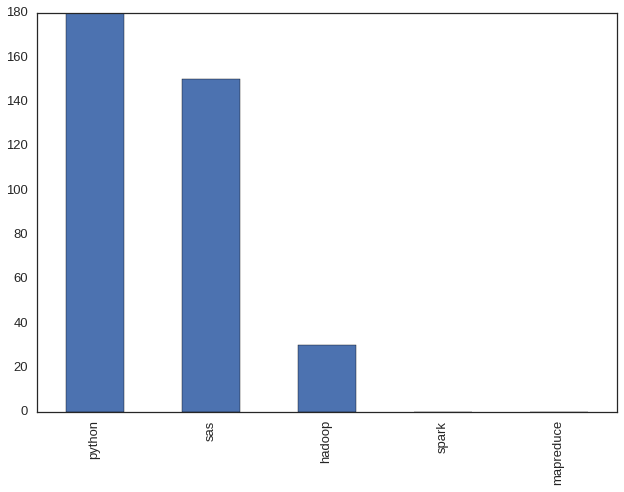

In [133]:
ps.plot(kind= 'bar')